# Introduction
#### The metric our group chose was quality of life, and having access to greenspaces is a part of that. The European Center for Environment and Human Health has specifically found that "people are happier when living in urban areas with greater amounts of green space. Compared to instances when they live in areas with less green space they show significantly lower mental distress (GHQ scores) and significantly higher wellbeing (life satisfaction)." A natural measure of green space is the  square footage of publicly owned outdoor space in each neighborhood, which includes parks, monuments, and even traffic medians. So without further ado, let's get into the data!

#### A small change

Source: https://www.ecehh.org/research/urban-green-space/#:~:text=Our%20analyses%20suggest%20that%20people,higher%20wellbeing%20(life%20satisfaction).

Data set 1 (classification of parks in Pittsburgh): https://data.wprdc.org/datastore/dump/fa329e3d-89ff-4708-8ddf-81bfedcad11d

Data set 2 (parks with square footage included): https://data.wprdc.org/datastore/dump/bb57d0a7-e8ee-4218-8906-0dedc903038c

#### First, we'll do some importing of the packages we'll need, and then change some default options so that the maximum numbers of rows and columns show in the notebook, given that the data sets I've chosen are large, and we don't want to miss any valuable data to an elpisis.

In [1]:
# load pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

ModuleNotFoundError: No module named 'pandas'

#### Now, let's load in the first data set, which, as you can see below, contains the name of each park, along with the neighborhood it's located in, what category of park it falls in (more on this in a moment), and even an image. 

In [6]:
# load data
parks_data_by_neighborhood = pd.read_csv("Parks-in-Pittsburgh.csv", 
                                       index_col="_id") 
parks_data_by_neighborhood.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,
1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


#### Because each row of this data frame represents a single park, counting how many times a given neighborhood appears in the data set is the same as counting how many parks each neighborhood has, so let's do that. 

In [9]:
parks_data_by_neighborhood['neighborhood'].value_counts()

neighborhood
East Liberty                 12
Central Business District    10
Beechview                     8
South Side Slopes             7
Point Breeze                  7
Mount Washington              6
Squirrel Hill South           6
Sheraden                      6
Hazelwood                     6
South Side Flats              6
South Oakland                 5
Troy Hill                     5
Brighton Heights              4
Marshall-Shadeland            4
Central Oakland               4
Elliott                       4
Manchester                    3
Lower Lawrenceville           3
Spring Hill-City View         3
Westwood                      3
Brookline                     3
Lincoln-Lemington-Belmar      3
Point Breeze North            3
Beltzhoover                   3
Upper Lawrenceville           3
Carrick                       3
Bloomfield                    3
Larimer                       3
Greenfield                    3
Garfield                      3
Crawford-Roberts           

#### That's nice, but let's make it a little easier to visually understand.

In [21]:
df_value_counts = parks_data_by_neighborhood['neighborhood'].value_counts().reset_index()
df_value_counts.columns = ['neighborhood', 'number of parks']
df_value_counts.head()



,neighborhood,number of parks
0,East Liberty,12
1,Central Business District,10
2,Beechview,8
3,South Side Slopes,7
4,Point Breeze,7


In [25]:
df_value_counts2 = df_value_counts['number of parks'].value_counts().reset_index()
df_value_counts2.columns = ['number of parks', 'neighborhoods with that number of parks']
df_value_counts2

,number of parks,neighborhoods with that number of parks
0,1,23
1,3,18
2,2,16
3,6,5
4,4,4
5,7,2
6,5,2
7,12,1
8,10,1
9,8,1


([<matplotlib.patches.Wedge at 0x2b0780e9f850>,
 [Text(0.6037272824172428, 0.9195180087769304, '1'),
  Text(-1.0185172269372562, 0.4154788303055186, '3'),
  Text(-0.5224462550073077, -0.9680133834967569, '2'),
  Text(0.4372970099475371, -1.00934202582224, '6'),
  Text(0.7861406570510631, -0.7694042288233948, '4'),
  Text(0.956548279517481, -0.5431531910540037, '7'),
  Text(1.0354490154551994, -0.3712752838432128, '5'),
  Text(1.0746323204410453, -0.23487310587526763, '12'),
  Text(1.0908450387657425, -0.14162309628081857, '10'),
  Text(1.098981522196787, -0.047324558846683525, '8')])

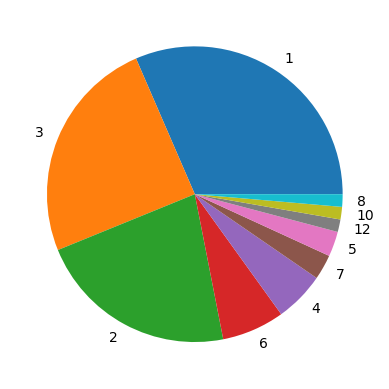

In [39]:
plt.pie(df_value_counts2['neighborhoods with that number of parks'], labels=df_value_counts2['number of parks'])

#### So what's that neighborhood with 12 parks? That seems like our clear winner...

Text(0, 0.5, 'Number of Parks')

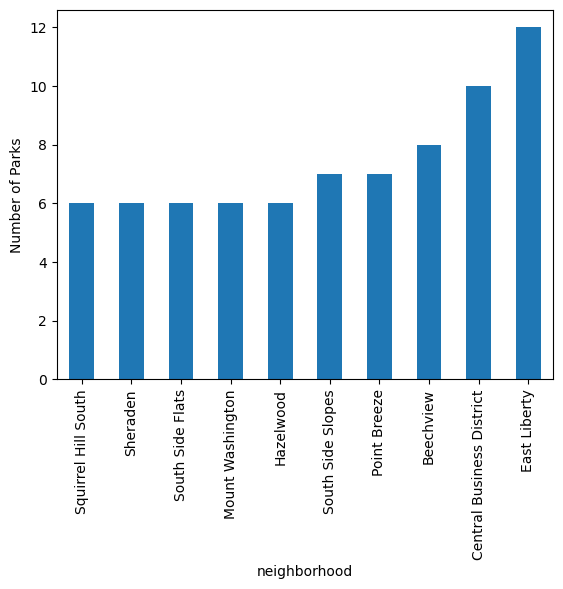

In [48]:
parks_data_by_neighborhood['neighborhood'].value_counts(ascending=True).tail(10).plot(kind='bar')
plt.ylabel('Number of Parks')

#### East Liberty! That was simple enough. But if we take a closer look at the dataframe itself, we realize why simply counting the number of rows that a neighborhood appears in in this data frame might be a mistake. 

In [53]:
query_mask = parks_data_by_neighborhood['neighborhood'] == "East Liberty"
east_liberty_greenspace = parks_data_by_neighborhood[query_mask]
east_liberty_greenspace

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,
9,2049886968,Amber Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,7,8,42003111500,2,8,5,3-23,40.459099,-79.931846
19,535602767,Baum Negley Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,7,8,42003111500,2,8,5,3-23,40.458656,-79.933369
52,210545055,East Liberty Park,Park,Parks - Eastern,NaN,East Liberty,9,11,42003111500,2,11,5,3-10,40.462065,-79.918745
53,1479452830,East Liberty Blvd Strip,Traffic Island/Median,Parks - Northeast,NaN,East Liberty,9,11,42003111500,2,11,5,3-10,40.463993,-79.920028
65,1066215150,Enright Park,Park,Parks - Northeast,NaN,East Liberty,9,8,42003111500,2,8,5,3-23,40.461885,-79.929833
81,148492759,Garland Park,Park,Parks - Northeast,NaN,East Liberty,9,11,42003111500,2,11,5,3-8,40.463949,-79.927637
93,1792849335,Highland Ave Plant Strip,Traffic Island/Median,2nd Division,NaN,East Liberty,9,11,42003111500,2,11,5,3-8,40.465839,-79.923081
137,1821011939,N Euclid Ave Square,Traffic Island/Median,2nd Division,NaN,East Liberty,9,11,42003111500,2,11,5,3-8,40.462624,-79.927904
138,1741699181,Negley Run Blvd,Traffic Island/Median,2nd Division,NaN,East Liberty,9,11,42003111300,2,11,5,3-10,40.466878,-79.917322


#### As we can see, most (8/12) of the "parks" in East Liberty are actually categorized as "Traffic island/median," which, according to the image column, look something like the below.

![Traffic island 1](https://tools.wprdc.org/images/pittsburgh/parks/Le_Roi_Rd_Island.jpg)

#### Now, that's not to say this patch isn't greenspace, and it does make the area a little more pleasant to look at, but it's not really comparable to what we would categorize as a park (see below).

![Real park](https://tools.wprdc.org/images/pittsburgh/parks/Frank_Curto_Park.jpg)

#### So maybe a better metric is to look at total *acrege* of greenspace instead of just the number of spaces that are classified as "parks." My initial data set doesn't include this measurement, but luckily, the WPRDC website contained another data set which has the information we're looking for. Let's load that data set in at this point. 

In [66]:
parks_data_by_area = pd.read_csv("Pittsburgh-Parks-2.csv", 
                                       index_col="_id") # use the column named _id as the row index
parks_data_by_area.head()

,objectid_1,objectid,acreage,sqft,final_cat,type,sector,origpkname,updatepknm,alterntnam,divname,shape_leng,globalid,created_user,created_date,last_edited_user,last_edited_date,maintenanceresponsibility,dpw_ac,globalid_1,shape_area,shape_length
_id,,,,,,,,,,,,,,,,,,,,,,
23398,1202,36.0,0.959034,41775.367101,Neighborhood Park,NP,15.0,Cliffside Parklet,August Wilson Park,Cliffside Park,Schenley,1313.832644,764d9a2f-719c-49c2-b747-8f276149bf04,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Schenley,0.959034,f781af9c-9ec2-4b5e-b5c5-9cc21608635c,6709.199219,390.397012
23399,1203,198.0,2.060117,89738.347520,Neighborhood Park,NP,2.0,Young Field,Young Field Park,Young Park,Riverview,1666.071794,9b969f67-1f2e-4f4b-8556-e4ac49ca208e,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Riverview,2.060117,659c4c55-50fc-4883-8606-76f029fcca47,14423.417969,511.980181
23400,1204,158.0,0.468682,20415.724875,Neighborhood Park,NP,8.0,Revenue Park,Roland Lockridge Community Park,Roland Lockridge Community Park,Frick,590.841007,44bbbdf5-c2db-451c-b880-9251b8211455,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Frick,0.468682,04e61cab-bea6-47dd-964a-0723197726cf,3273.722656,236.488235
23401,1205,72.0,1.955430,85178.182207,Neighborhood Park,NP,12.0,Friendship Park,Friendship Park,Friendship Park,Highland,1901.426599,f95cbafc-dcd8-493f-8b98-89745c6434ca,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Highland,1.955430,22563a68-61d3-46f3-9d5c-4558ee12be1f,13686.265625,760.982871
23402,1206,87.0,5.108070,222506.623799,Neighborhood Park,NP,12.0,Heths Playground,Heth's Park,Heth's Park,Highland,2181.061307,a6a4ac92-5a00-4af5-9f11-716e51079fea,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Highland,5.108070,b5b34833-e1d5-430f-afcc-40a1670d545d,35767.898438,875.156997


#### This data set, however, doesn't actually have the neighborhood where each park is located as a column, and so we need both of these data sets to extract the number of acres of greenspace per neighborhood. Luckily, pandas allows us to merge datasets pretty seamlessly, once I do some quick column renaming.

In [67]:
parks_data_by_area.rename(columns={'updatepknm': 'name'}, inplace=True)

In [68]:
combined_square_footage_and_neighborhood = pd.merge(parks_data_by_neighborhood, parks_data_by_area, on="name")

In [70]:
combined_square_footage_and_neighborhood.head(10)

,id,name,type_x,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude,objectid_1,objectid,acreage,sqft,final_cat,type_y,sector,origpkname,alterntnam,divname,shape_leng,globalid,created_user,created_date,last_edited_user,last_edited_date,maintenanceresponsibility,dpw_ac,globalid_1,shape_area,shape_length
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197,1303,1.0,1.659517,7.228826e+04,Neighborhood Park,NP,5.0,Able Long Parklet,Able Long Park,McKinley,1079.638582,fb46cd7e-fcf3-47de-86b2-b44a62ecb0da,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - McKinley,1.659517,49bbeac5-d343-4ab8-9424-631dacccd22a,11596.476562,432.518214
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018,1309,2.0,0.381545,1.662005e+04,Neighborhood Park,NP,15.0,"Albert ""Turk"" Graham Parklet","Albert ""Turk"" Graham Park",Schenley,542.404378,98c0046f-47d7-455c-b39d-5183317e15d8,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Schenley,0.381545,f11ad5c6-b0a3-4dfe-9759-9ffd5fd57e86,2668.734375,217.410344
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017,1225,200.0,0.575310,2.506040e+04,Riverfront Park,RVR,16.0,Alcoa Park,Alcoa Park,Riverview,912.328695,66d69aea-4c7d-4aac-8aa6-9c7ef7453247,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Riverview,0.575310,029679e7-a513-4e1f-aa0d-6643daa44bfc,4024.839844,365.239095
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158,1343,53.0,61.385906,2.673959e+06,Community Park,CP,3.0,East Common Park,Allegheny Commons Park,Riverview,8643.019657,ed54111f-f829-49c1-87b0-4f0e06c2ccaa,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Riverview,61.385906,cff02f10-d822-4486-a69f-e30c1fab6baa,429525.476562,9038.509074
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907,1246,4.0,2.285582,9.955954e+04,Riverfront Park,RVR,16.0,Allegheny Landing Park,Allegheny Landing Park,Riverview,1579.933657,4c54672c-8a00-4670-a599-1b3e59c22d84,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Riverview,2.285582,ddcdc30a-61da-4934-bf80-66f09dd27fe5,15989.742188,626.966327
5,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416,1231,5.0,1.548130,6.743627e+04,Riverfront Park,RVR,16.0,Allegheny Riverfront Park,Allegheny Riverfront Park,Riverview,3789.706844,56eb2a1a-f465-4488-8ee7-2939c1a56513,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Riverview,1.548130,297d4fb8-5cf6-4ab5-a3ff-f7f49d47414c,10829.843750,1690.459541
6,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852,1307,6.0,0.175698,7.653375e+03,Neighborhood Park,NP,3.0,Alpine #2 Parklet,Alpine Gardens Park,Riverview,302.562183,d2665673-a177-4850-8941-8ce097a592ec,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Riverview,0.175698,859f290a-272d-44db-b761-11c58339971c,1229.546875,200.500299
7,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855,1365,7.0,4.027081,1.754189e+05,Neighborhood Park,NP,5.0,Alton Playground,Alton Park,McKinle

#### Great! Now let's find out which neighborhood has the most acrege of greenspace. Note: I'm using acrege here simply because if we use square footage, the numbers get big FAST, and we don't need all that. But, if you're interested, each acre equates to 43,560 square feet.

In [76]:
combined_square_footage_and_neighborhood.groupby('neighborhood')['acreage'].sum()

neighborhood
Allegheny Center               63.911119
Allentown                      32.919514
Arlington                       5.808033
Banksville                     19.211646
Bedford Dwellings               8.081632
Beechview                      39.660683
Beltzhoover                    80.150916
Bloomfield                      3.753491
Bluff                           0.108286
Bon Air                         0.779470
Brighton Heights               35.231589
Brookline                     109.728309
Carrick                        32.136299
Central Business District       8.721568
Central Lawrenceville           6.027944
Central Northside               0.921885
Central Oakland                 1.844071
Crafton Heights                 7.276776
Crawford-Roberts                1.861569
Duquesne Heights                0.853850
East Carnegie                   0.470285
East Hills                     11.135922
East Liberty                   12.330646
Elliott                        30.682895
Esp

#### Now, let's make it visual.

Text(0.5, 0, 'Neighborhood')

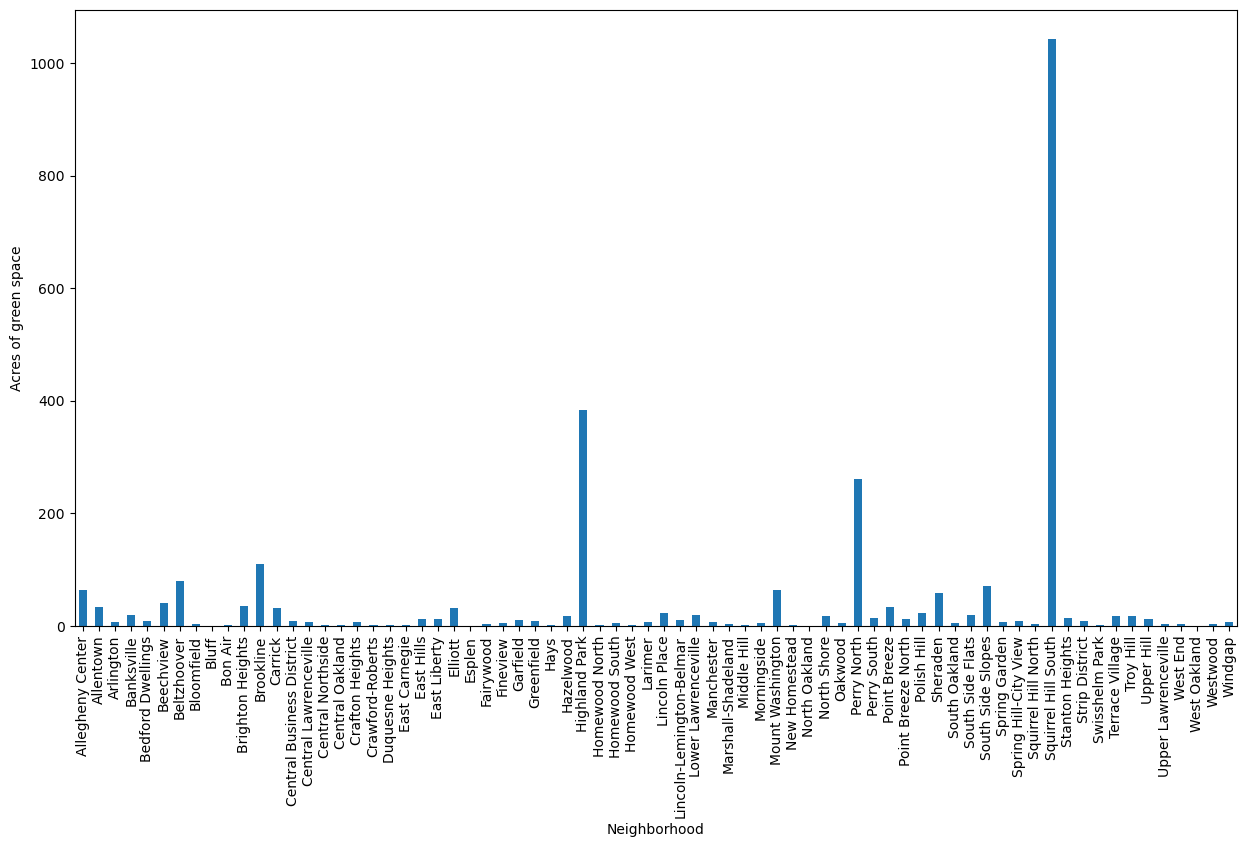

In [86]:
combined_square_footage_and_neighborhood.groupby('neighborhood')['acreage'].sum().plot(kind='bar', figsize=(15, 8))
plt.ylabel('Acres of green space')
plt.xlabel('Neighborhood')

## So the winners are (in no particular order, except this one):
1. Squirrel Hill South
2. Highland Park
3. Perry North

## Some of the lovely scenes are winning neighborhoods have to offer. Feast your eyes:

![Frick Park](https://tools.wprdc.org/images/pittsburgh/parks/Frick_Park.jpg)

![Highland Park](https://tools.wprdc.org/images/pittsburgh/parks/Highland_Park.jpg)

# Conclusion
#### Squirrel Hill South is one of my favorite neighborhoods in Pittsburgh, mostly because of the shopping and the beautiful homes. I'd never thought my preference for it was specifically related to the amount of wide open space, but the more I think about it, the natural beauty is part of what I enjoy about the neighborhood. It would also be interesting to see how this is related to the crime rates in these neighborhoods, since there has been evidence to suggest that more greenspace correlates to less crime. It was also interesting to see that how you measured greenspace (number of parks vs. square footage) really impacted the result, though there was still some overlap between the two, as might be expected, with neighborhoods like East Liberty appearing near the top of both datasets.